In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/Users/imhrithik/Downloads/Hack-AI-Thon Project/tweets/_tweets_1-100.csv')

In [5]:
df.head()


,Name,Handle,Timestamp,Verified,text,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,Arjun lal,@Arjunla60518436,2024-02-04T04:43:46.000Z,False,"होमगार्ड बिल\n1946/1947,1962/1963की फाइल गृह म...",0,0,0,0,['#होमगार्ड्स_एक्ट_मे_संशोधन_करें'],"['@narendramodi', '@CMODelhi', '@ANI']",[],https://pbs.twimg.com/profile_images/109554816...,https://twitter.com/Arjunla60518436/status/175...,tweet_id:1754002785933365424
1,Lakshyaek,@Lakshya__ek,2024-02-04T04:43:46.000Z,False,,0,0,0,0,[],"['@HMOIndia', '@NIA_India', '@PMOIndia', '@nar...",[],https://pbs.twimg.com/profile_images/156892440...,https://twitter.com/Lakshya__ek/status/1754002...,tweet_id:1754002784012386750
2,Deepak Prajapati,@DeepakP42553647,2024-02-04T04:43:44.000Z,False,#पीड़ित_पंचायत_सहायक,0,0,0,0,['#पीड़ित_पंचायत_सहायक'],[],[],https://pbs.twimg.com/profile_images/160718084...,https://twitter.com/DeepakP42553647/status/175...,tweet_id:1754002777058287709
3,venkat,@venkatars1,2024-02-04T04:43:43.000Z,False,https://thewire.in/politics/fact-check-have-ch...,0,0,0,0,[],[],[],https://abs.twimg.com/sticky/default_profile_i...,https://twitter.com/venkatars1/status/17540027...,tweet_id:1754002774201934216
4,tyrenakki,@tyre_nakki,2024-02-04T04:43:38.000Z,False,increase your followers to blame . pipe down ...,0,0,0,1,[],['@narendramodi'],[],https://abs.twimg.com/sticky/default_profile_i...,https://twitter.com/tyre_nakki/status/17540027...,tweet_id:1754002753594995090


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           100 non-null    object
 1   Handle         100 non-null    object
 2   Timestamp      100 non-null    object
 3   Verified       100 non-null    bool  
 4   text           95 non-null     object
 5   Comments       100 non-null    int64 
 6   Retweets       100 non-null    int64 
 7   Likes          100 non-null    int64 
 8   Analytics      100 non-null    int64 
 9   Tags           100 non-null    object
 10  Mentions       100 non-null    object
 11  Emojis         100 non-null    object
 12  Profile Image  100 non-null    object
 13  Tweet Link     100 non-null    object
 14  Tweet ID       100 non-null    object
dtypes: bool(1), int64(4), object(10)
memory usage: 11.2+ KB


In [7]:
df.isnull().sum()


Name             0
Handle           0
Timestamp        0
Verified         0
text             5
Comments         0
Retweets         0
Likes            0
Analytics        0
Tags             0
Mentions         0
Emojis           0
Profile Image    0
Tweet Link       0
Tweet ID         0
dtype: int64

In [8]:
df.columns

Index(['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments',
       'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis',
       'Profile Image', 'Tweet Link', 'Tweet ID'],
      dtype='object')

In [9]:



text_df = df.drop(['Name', 'Handle', 'Timestamp', 'Verified',  'Comments',
       'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis',
       'Profile Image', 'Tweet Link', 'Tweet ID'], axis=1)
text_df.head()

,text
0,"होमगार्ड बिल\n1946/1947,1962/1963की फाइल गृह म..."
1,
2,#पीड़ित_पंचायत_सहायक
3,https://thewire.in/politics/fact-check-have-ch...
4,increase your followers to blame . pipe down ...


In [10]:

print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

होमगार्ड बिल
1946/1947,1962/1963की फाइल गृह मंत्रालय पहुंच गई है
माननीय अमितशाह व माननीय नरेंद्र मोदी जी अंग्रेजों के काले कानून को खत्म करके होमगार्ड बिल में संशोधन करके भारतवर्ष होमगार्ड का सपना पूरा करें#होमगार्ड्स_एक्ट_मे_संशोधन_करें 

     

#पीड़ित_पंचायत_सहायक 

https://thewire.in/politics/fact-check-have-chinese-companies-really-donated-to-the-pm-cares-fund…You can get this one clarified as things are not clear. 

increase your followers to blame  . pipe down and do service to Swamy. 



In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    95 non-null     object
dtypes: object(1)
memory usage: 932.0+ bytes


In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
text_df.text= text_df.text.astype(str)
text_df.text = text_df['text'].apply(data_processing)



In [14]:
text_df = text_df.drop_duplicates('text')


In [15]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [16]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [17]:
text_df.head()


,text
0,हमगरड बल 1946194719621963क फइल गह मतरलय पहच गई...
1,
2,पडत_पचयत_सहयक
3,get one clarified things clear
4,increase followers blame pipe service swamy


In [18]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

हमगरड बल 1946194719621963क फइल गह मतरलय पहच गई ह मननय अमतशह व मननय नरदर मद ज अगरज क कल कनन क खतम करक हमगरड बल म सशधन करक भरतवरष हमगरड क सपन पर करहमगरडस_एकट_म_सशधन_कर 

 

पडत_पचयत_सहयक 

get one clarified things clear 

increase followers blame pipe service swamy 



In [19]:
text_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 98
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    85 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


In [20]:
def polarity(text):
    return TextBlob(text).sentiment.polarity


In [21]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [22]:
text_df.head(10)


,text,polarity
0,हमगरड बल 1946194719621963क फइल गह मतरलय पहच गई...,0.0
1,,0.0
2,पडत_पचयत_सहयक,0.0
3,get one clarified things clear,0.1
4,increase followers blame pipe service swamy,0.0
5,kumar vishwas pls bjp rajya sabha,0.0
7,रजसथन क तरज पर ews सरलकरण ह ews अतरगत वभनन जतय...,0.0
8,nan,0.0
9,पडत_पचयत_सहयक6000_म_दम_नह_18000_स_कम_नह,0.0
10,एनसटई क गजट दखकर बएड करन वल क कय कसर कट न उनह ...,0.0


In [23]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [24]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)


In [25]:
text_df.head()


,text,polarity,sentiment
0,हमगरड बल 1946194719621963क फइल गह मतरलय पहच गई...,0.0,Neutral
1,,0.0,Neutral
2,पडत_पचयत_सहयक,0.0,Neutral
3,get one clarified things clear,0.1,Positive
4,increase followers blame pipe service swamy,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

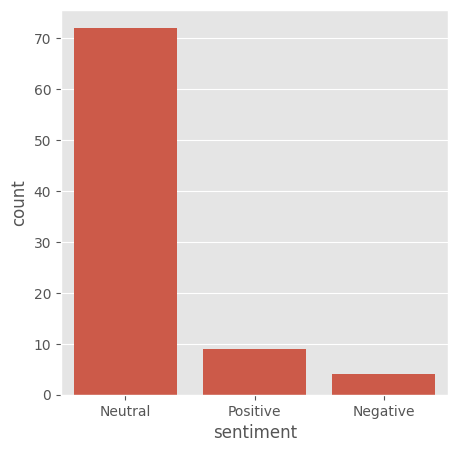

In [26]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)


Text(0.5, 1.0, 'Distribution of sentiments')

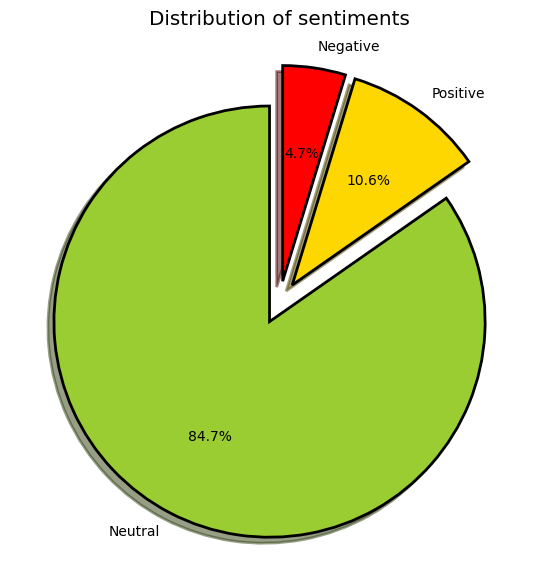

In [27]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
